In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train['pixel100'].max()

255

In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[0, list(range(1,785))].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

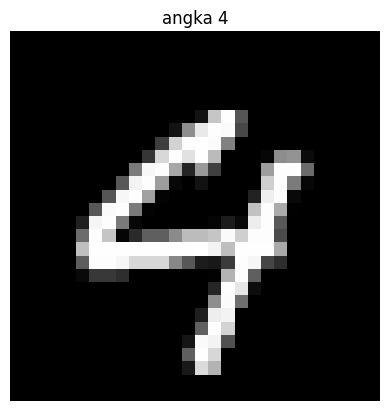

In [7]:
idx = 577
label = df_train['label'][idx]
img_vec = df_train.iloc[idx, list(range(1,785))].to_numpy()
img = img_vec.reshape((28,28)) #reshape menjadi 28 x 28

plt.title(f'angka {label}')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Data Preparation

In [27]:
y = df_train['label'].to_numpy()
y.shape

(42000,)

In [9]:
X = df_train.drop('label', axis=1).to_numpy()
X_test = df_test.to_numpy()
print(X.shape, X_test.shape)

(42000, 784) (28000, 784)


In [10]:
#dataset split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(31500, 784) (31500,)
(10500, 784) (10500,)


In [11]:
#create standardized dataset using standard scaler
stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_std = stdscl.transform(X_train)
X_val_std = stdscl.transform(X_val)

In [29]:
#normalization
X_train_norm = X_train/255
X_val_norm = X_val/255
X_test_norm = X_test/255
print(X_train_norm.min(), X_train_norm.max())

0.0 1.0


In [30]:
print(X_train[0][300:400])
print(X_train_norm[0][300:400])

[113   0   0   0   0   0   0   0   0   0   0   0   0 114 253 253 253 253
 253 253 253 253 253 253 249 251 253 251  18   0   0   0   0   0   0   0
   0   0   0   0   0  95 210 242 214 210 210 210 210 210 154 102  20 135
 253 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48
   7   0   0   0   0   0   0   0   0 216 253 150   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[0.44313725 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.44705882 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.97647059 0.98431373 0.99215686 0.98431373 0.07058824 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.37254902
 0.82352941 0.94901961 0.83921569 0.82352941 0.82352941 0.82352941
 0.82352941 0.82352941 0.60392157 0.4        0.07843137 0.52941176
 0.99215686 0.58823529

## Modeling

Machine Learning

In [12]:
# svc = LinearSVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_val)
# score = accuracy_score(y_val, y_pred)
# score

In [13]:
# y_pred_test = svc.predict(X_test)

In [14]:
# y_pred_test[:10]

In [15]:
# #create submission file
# submit_dict = {
#     'ImageId' : list(range(1, len(y_pred_test)+1)),
#     'Label' : y_pred_test,

# }
# df_submit = pd.DataFrame(submit_dict)
# df_submit.head()

In [16]:
# #create submission file with loop
# submit_dict2 = {
#     'ImageId' : [],
#     "Label" : [],
# }

# for i, y in enumerate(y_pred_test):
#     submit_dict2['ImageId'].append(i+1)
#     submit_dict2['Label'].append(y)

# df_submit2 = pd.DataFrame(submit_dict2)
# df_submit2.head()

In [17]:
# df_submit.to_csv('result.csv', index=False)

### Neural Network

In [19]:
onehot = OneHotEncoder()
onehot.fit(y_train.reshape(-1,1))
y_train_hot = onehot.transform(y_train.reshape(-1,1)).toarray()
y_val_hot = onehot.transform(y_val.reshape(-1,1)).toarray()

print(y_train.shape, y_train_hot.shape)
print(y_val.shape, y_val_hot.shape)

(31500,) (31500, 10)
(10500,) (10500, 10)


In [37]:
epoch = 120

model_nn= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_nn.summary()

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='min',
    verbose=1,
    patience=100,
    restore_best_weights=True
)

#adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd = tf.keras.optimizers.SGD(learning_rate=0.00075)

model_nn.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

history = model_nn.fit(
    X_train_norm,
    y_train_hot,
    epochs=epoch,
    validation_data=(X_val_norm, y_val_hot),
    callbacks=[es],
    batch_size=128
    )

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2650 - loss: 2.1155 - val_accuracy: 0.7546 - val_loss: 1.2949
Epoch 2/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6403 - loss: 1.2629 - val_accuracy: 0.8369 - val_loss: 0.7166
Epoch 3/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7432 - loss: 0.8466 - val_accuracy: 0.8630 - val_loss: 0.5443
Epoch 4/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7772 - loss: 0.7102 - val_accuracy: 0.8793 - val_loss: 0.4641
Epoch 5/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.6045 - val_accuracy: 0.8883 - val_loss: 0.4168
Epoch 6/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8289 - loss: 0.5632 - val_accuracy: 0.8915 - val_loss: 0.3881
Epoch 7/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8436 - loss: 0.5249 - val_accuracy: 0.8982 - val_loss: 0.3625
Epoch 8/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.4869 - val_accu

In [41]:
result = history.history
n_epochs = np.arange(0, len(result['accuracy']))

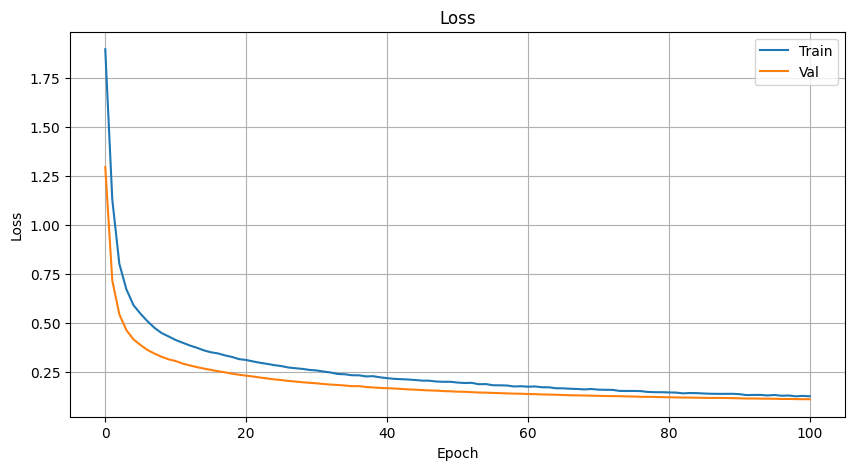

In [43]:
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(n_epochs, result['loss'])
plt.plot(n_epochs, result['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

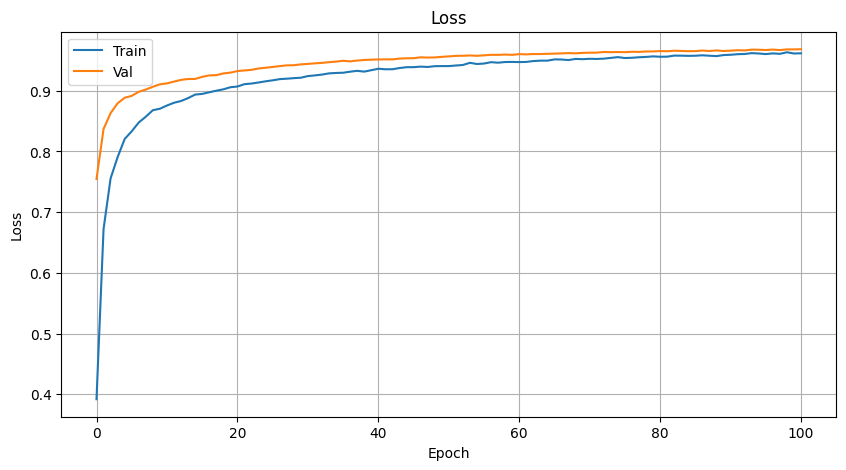

In [44]:
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(n_epochs, result['accuracy'])
plt.plot(n_epochs, result['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.grid()
plt.show()

In [45]:
y_pred_test = model_nn.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [46]:
y_pred = tf.math.argmax(y_pred_test, axis=1)

In [47]:
print(y_pred_test[0])
print(y_pred.numpy()[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


In [48]:
y_pred = y_pred.numpy()
y_pred.shape

(28000,)

In [49]:
#create submission file
submit_dict = {
    'ImageId' : list(range(1, len(y_pred)+1)),
    'Label' : y_pred,

}
df_submit = pd.DataFrame(submit_dict)
df_submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2


In [50]:
df_submit.to_csv('result_nn', index=False)